# Lesson 4

## Intro

Hello, everyone! Here is the material for the fourth lesson. 

As you already know, in mathematical statistics there is a task of testing statistical hypotheses: the null hypothesis is tested against some alternative. Recall that last time you were testing two samples for homogeneity. In this lesson we are going to test the homogeneity of several samples. But first, a quick reminder.

### Reminder. Comparison of Averages of Two Samples. Student's t-test.

You can use Student's t-test (or, as it is also called, $t$-test) to compare the averages of two samples.

It is worth noting that the classical Student's test uses the assumption that the variances are equal.

Consider the following hypotheses:
<br>$H_0:$ The samples have equal averages,
<br>$H_1:$ The samples have different averages.

Suppose there are two independent normal samples of size $n_1$ and $n_2$. If the variances coincide, the statistic of the criterion is

$$
t = \frac{\overline X_1 - \overline X_2}{s_X \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}} ~,~~s_X=\sqrt {\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}},
$$
where $s$ – unbiased variance estimation:
$$
s^2=\frac {\sum^n_{t=1}(X_t-\overline X)^2}{n-1}
$$

Note also that this statistic has a Student distribution $t(n_1 + n_2 - 2)$.

## Part 1. Comparison of the Variance of Several Samples.

Under the assumption of normal samples, the Bartlett criterion can be used to check the equality of variance of several samples.

Let all $X_{ij} \sim \mathcal{N}(m_j, \sigma_j), \:(i = 1, \dots, n_j, j = 1, \dots, k)$ are independent, and the parameters $m_j, \sigma_j$ are unknown. As we know, the unbiased estimates for the shift and scale parameters are:

$$
X_{\cdot j} = \dfrac{1}{n_j} \sum_{i = 1}^{n_j} X_{ij} \; \text{и} \; S_{j}^{2} = \dfrac{1}{n_j - 1} \sum_{i = 1}^{n_j}(X_{ij} - X_{\cdot j})^2.
$$

Let $N = n_1 + \dots + n_k$. The hypothesis of equality of all variances is tested:
<br>$H_0:$ All samples have equal variance,
<br>$H_1:$ Not all samples have equal variance.

The Bartlett criterion statistic is the following function

$$
B = \dfrac{\dfrac{1}{N} \sum_{j = 1}^{k} n_j S_j^2}{\sqrt[N]{\prod_{j = 1}^{k}(S_j^2)^{n_j}}}.
$$

If the null hypothesis is satisfied and all $n_j > 3$, then the statistic

$$
B^* = \gamma^{-1} N \ln{B}, \text{где } \gamma = 1 + \dfrac{1}{3(k - 1) }\left[\left( \sum_{j = 1}^{k} \dfrac{1}{n_j} \right) - \dfrac{1}{N} \right]
$$

has an approximate $\chi_{k - 1}^2$ distribution.

Let us test the Bartlett criterion for the following data set.

In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 100)
df = pd.read_excel("../Data-EN/Chromium.xls")
df.head()

,Plate1,Plate2,Plate3,Plate4,Plate5,Plate6,Plate7,Plate8
0,1.42,1.42,1.42,1.38,1.36,1.37,1.38,1.32
1,1.42,1.39,1.38,1.41,1.37,1.34,1.37,1.33
2,1.41,1.38,1.41,1.41,1.37,1.38,1.36,1.34
3,1.44,1.38,1.41,1.42,1.39,1.34,1.37,1.32


In [2]:
display(df)

,Plate1,Plate2,Plate3,Plate4,Plate5,Plate6,Plate7,Plate8
0,1.42,1.42,1.42,1.38,1.36,1.37,1.38,1.32
1,1.42,1.39,1.38,1.41,1.37,1.34,1.37,1.33
2,1.41,1.38,1.41,1.41,1.37,1.38,1.36,1.34
3,1.44,1.38,1.41,1.42,1.39,1.34,1.37,1.32


As usual, let's call the `info()` method.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Plate1  4 non-null      float64
 1   Plate2  4 non-null      float64
 2   Plate3  4 non-null      float64
 3   Plate4  4 non-null      float64
 4   Plate5  4 non-null      float64
 5   Plate6  4 non-null      float64
 6   Plate7  4 non-null      float64
 7   Plate8  4 non-null      float64
dtypes: float64(8)
memory usage: 384.0 bytes


Let's also call the `describe()` method.

In [4]:
df.describe()

,Plate1,Plate2,Plate3,Plate4,Plate5,Plate6,Plate7,Plate8
count,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,1.422500,1.39250,1.405000,1.405000,1.372500,1.357500,1.370000,1.327500
std,0.012583,0.01893,0.017321,0.017321,0.012583,0.020616,0.008165,0.009574
min,1.410000,1.38000,1.380000,1.380000,1.360000,1.340000,1.360000,1.320000
25%,1.417500,1.38000,1.402500,1.402500,1.367500,1.340000,1.367500,1.320000
50%,1.420000,1.38500,1.410000,1.410000,1.370000,1.355000,1.370000,1.325000
75%,1.425000,1.39750,1.412500,1.412500,1.375000,1.372500,1.372500,1.332500
max,1.440000,1.42000,1.420000,1.420000,1.390000,1.380000,1.380000,1.340000


As we can see from our input data table above, we have 8 plates-samples whose variances need to be checked. Let's think of some more elegant function for creating samples than just enumerating the columns of the table as the argument of the function.

First, we make a list in which we put the names of all the columns from the table. 

In [5]:
names = list(df.columns)
print(names)

['Plate1', 'Plate2', 'Plate3', 'Plate4', 'Plate5', 'Plate6', 'Plate7', 'Plate8']


We will use the `*` operator to automatically look through all the tables - unpacking into function arguments. You can read more details, for example, [here](https://tproger.ru/translations/asterisks-in-python-what-they-are-and-how-to-use-them/).

In [6]:
f, p = stats.bartlett(*[df[col] for col in names])
print("F:", f)
print("P-value:", p)

F: 3.7215025069362024
P-value: 0.8112377426908652


We obtained a large $P$-value. This means that we can confidently accept the hypothesis of equality of variances.

## Part 2. Comparison of Averages of Several Samples.

The classical Student's test essentially uses the assumption of the normality of the samples, as well as the equality of variances. Let us save this requirement for the case of many samples. Moreover, we have already checked the equality of variances.

Let us consider the problem of testing the averages of several samples. Let us formulate the following hypotheses.

$H_0:$ All samples have equal averages,
<br>$H_1:$ Not all samples have equal averages.

We will use the `f_oneway()` method from the `scipy.stats` library to perform a single-factor analysis of variance.

In [7]:
f, p = stats.f_oneway(*[df[col] for col in names])
print("F:", f)
print("P-value:", p)

F: 16.26457399103135
P-value: 1.0530803541299794e-07


What do we see? The statistic value is large. The $P$-value is very small. This means that we can reject the hypothesis of equality of the averages with sufficient certainty.

## Part 3. Note About the "long" Table Format and the Mustache Boxes.

Our original table is presented in a "wide" format. This format is more convenient to read for a human, but the "long" format is better for a computer. Let's perform the necessary transformations, observing the difference.

In [8]:
display(df)

,Plate1,Plate2,Plate3,Plate4,Plate5,Plate6,Plate7,Plate8
0,1.42,1.42,1.42,1.38,1.36,1.37,1.38,1.32
1,1.42,1.39,1.38,1.41,1.37,1.34,1.37,1.33
2,1.41,1.38,1.41,1.41,1.37,1.38,1.36,1.34
3,1.44,1.38,1.41,1.42,1.39,1.34,1.37,1.32


In [9]:
dfMelt = pd.melt(df, var_name = 'plast', value_name = 'value' )

In [10]:
print(dfMelt)

     plast  value
0   Plate1   1.42
1   Plate1   1.42
2   Plate1   1.41
3   Plate1   1.44
4   Plate2   1.42
5   Plate2   1.39
6   Plate2   1.38
7   Plate2   1.38
8   Plate3   1.42
9   Plate3   1.38
10  Plate3   1.41
11  Plate3   1.41
12  Plate4   1.38
13  Plate4   1.41
14  Plate4   1.41
15  Plate4   1.42
16  Plate5   1.36
17  Plate5   1.37
18  Plate5   1.37
19  Plate5   1.39
20  Plate6   1.37
21  Plate6   1.34
22  Plate6   1.38
23  Plate6   1.34
24  Plate7   1.38
25  Plate7   1.37
26  Plate7   1.36
27  Plate7   1.37
28  Plate8   1.32
29  Plate8   1.33
30  Plate8   1.34
31  Plate8   1.32


<AxesSubplot:xlabel='plast', ylabel='value'>

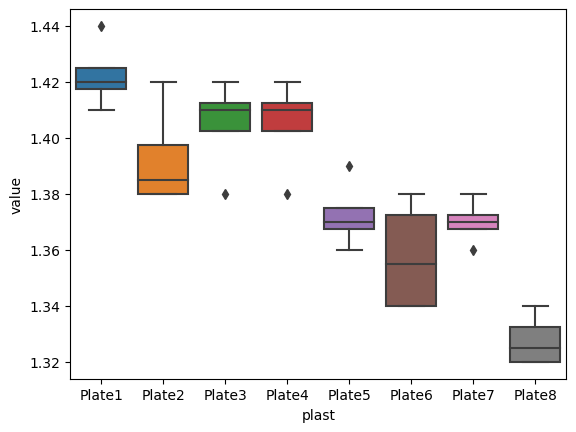

In [11]:
sns.boxplot(x = 'plast', y = 'value', data=dfMelt)

How should these pictures be understood?
* If the box is short and the whiskers are long, it indicates that the data are tightly clustered around the median, and the variance is small. 
* If the box is long and the whiskers are short, it indicates that the data are scattered and the variance is large.

## Part 4. Finding the Dependence of the Variance on the Mean.

First, let's apply the Bartlett criterion to test the variance of the following data set.

In [12]:
dfSamples = pd.read_excel('../Data-EN/Samples.xls')

In [13]:
dfSamples.head()

,Sample1,Sample2,Sample3,Sample4,Sample5
0,0.085,0.180,0.487,0.683,0.970
1,0.090,0.183,0.489,0.684,0.970
2,0.091,0.187,0.490,0.688,0.972
3,0.093,0.188,0.490,0.690,0.982
4,0.095,0.188,0.494,0.690,0.986


In [14]:
dfSamples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sample1  20 non-null     float64
 1   Sample2  20 non-null     float64
 2   Sample3  20 non-null     float64
 3   Sample4  20 non-null     float64
 4   Sample5  20 non-null     float64
dtypes: float64(5)
memory usage: 928.0 bytes


In [15]:
dfSamples.describe()

,Sample1,Sample2,Sample3,Sample4,Sample5
count,20.000000,20.000000,20.00000,20.000000,20.000000
mean,0.100500,0.194900,0.50210,0.703000,0.999850
std,0.007944,0.009049,0.01167,0.013131,0.016903
min,0.085000,0.180000,0.48700,0.683000,0.970000
25%,0.096500,0.189500,0.49400,0.693750,0.989750
50%,0.101000,0.192500,0.49950,0.703000,1.001000
75%,0.104250,0.201000,0.50550,0.709500,1.015250
max,0.120000,0.216000,0.52800,0.736000,1.021000


In [16]:
names = list(dfSamples.columns)
f, p = stats.bartlett(*[dfSamples[col] for col in names])
print("F:", f)
print("P-value:", p)

F: 13.255157005107282
P-value: 0.010094060746970808


Again we obtain a sufficiently small $P$-value. Consequently, the null hypothesis of equality of variance can be rejected. 

But what do the variance values depend on? The most naive idea that can arise here is that variance values depend on mean values. 

However, there is a small nuance here related to the dimensions: the dimensions of the variance and the mean are not equal. Therefore, let us take the standard deviation instead of the variance.

Let us test this idea and plot the dependence of the variance on the mean.

Set some empty list that will contain pairs of points in the plane to plot. These pairs will be `std` and `mean`. 

In [17]:
dots = []
for column in dfSamples.columns:
    dots.append([dfSamples[column].std(), dfSamples[column].mean()])
print(dots)

[[0.007943882121349404, 0.1005], [0.009048989475422976, 0.1949], [0.011670475568716138, 0.5021], [0.013130919717657967, 0.7030000000000001], [0.016903051733185227, 0.99985]]


All that remains is to plot the graph! Again we use the `*` operator and also the `zip()` method.

Text(0, 0.5, 'mean')

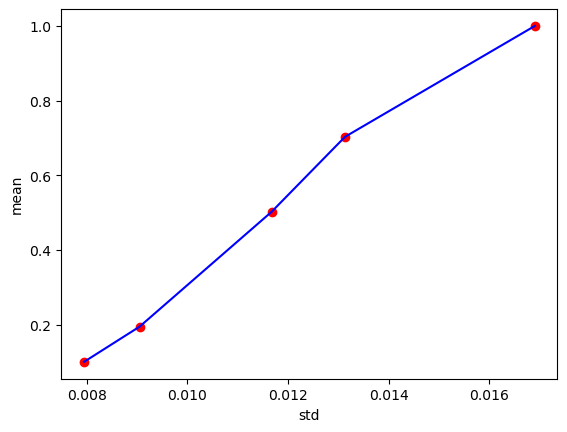

In [18]:
plt.scatter(*zip(*dots), color = 'red')
plt.plot(*zip(*dots), color = 'blue')
plt.xlabel('std')
plt.ylabel('mean')

**P.S.** See how `zip()` works.

> Test question: What is the difference between `zip(dots)` and `zip(*dots)`?

## Task.

Complete your individual assignment.